In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


## EDA

#### View Images

First I will make sure that I have access to the images and that I am able to properly read them.

In [9]:
def present_images(dir, count=10):
    dirs=os.listdir(dir)
    files=[os.path.join(dir,file) for file in dirs][:count]
    
    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate(files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)
        
    plt.tight_layout()

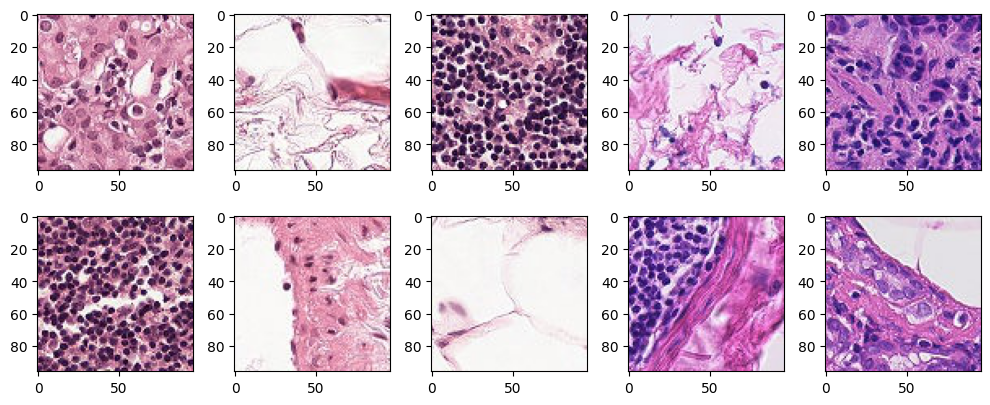

In [10]:
present_images("../histopathologic-cancer-detection/train")

Next I will determine how many images there are in the training and test sets, and how many labels we are provided in the labels csv.

In [12]:
training_labels = pd.read_csv('../histopathologic-cancer-detection/train_labels.csv')
num_train_images = len(os.listdir('../histopathologic-cancer-detection/train'))
num_test_images = len(os.listdir('../histopathologic-cancer-detection/test'))

print(f"Number of labels: {training_labels.shape[0]}")
print(f"Number of training images: {num_train_images}")
print(f"Number of test images: {num_test_images}")

Number of labels: 220025
Number of training images: 220025
Number of test images: 57458


Next I will make sure the data is clean by verifying there are no null values or duplicate values.

In [15]:
print(f"Duplicate values: {training_labels.duplicated().sum()}")
print("Missing Values: ")
print(training_labels.isnull().sum())

Duplicate values: 0
Missing Values: 
id       0
label    0
dtype: int64


## CNN Model

I have opted to build a Convolutional Neural Network Model as it is the most commonly used model for deep learning regarding image related tasks due to their feature extraction, spactial invariance, parameter efficiency and other aspects. 